<a href="https://colab.research.google.com/github/shivamkrishna1000/MNIST-Digit-Classification-with-Neural-Network/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [65]:
(xtrain,ytrain), (xtest,ytest)=mnist.load_data()

In [66]:
type(xtrain)

numpy.ndarray

In [67]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [68]:
print(xtrain[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [69]:
print(xtrain[10].shape)

(28, 28)


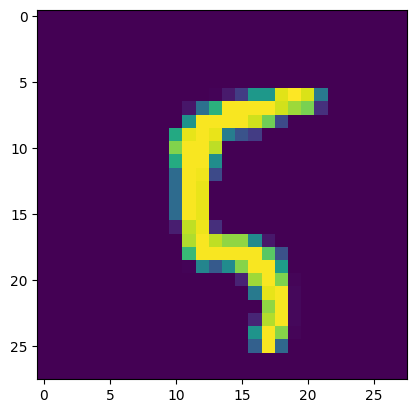

5


In [70]:
#displaying the image

plt.imshow(xtrain[100])
plt.show()

print(ytrain[100])

In [71]:
#unique values in ytrain
print(np.unique(ytrain))


#unique values in ytest
print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [72]:
#scaling the values
xtrain=xtrain/255
xtest=xtest/255

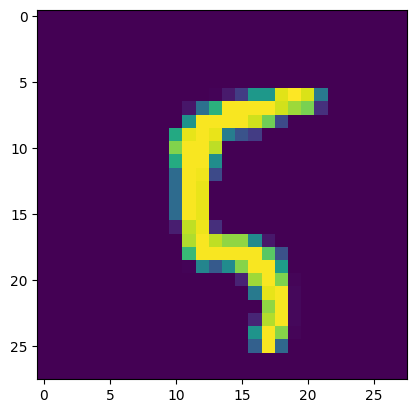

5


In [73]:
#displaying the image

plt.imshow(xtrain[100])
plt.show()

print(ytrain[100])

In [74]:
print(xtrain[100])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [75]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [76]:
#compiling the nueral network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [77]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2995 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1387 - accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1030 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0689 - accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0592 - accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0452 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0394 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [78]:
loss, accuracy=model.evaluate(xtest,ytest)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9709
0.9708999991416931


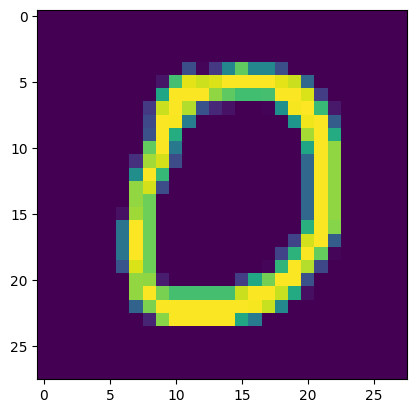

In [79]:
plt.imshow(xtest[10])
plt.show()

In [80]:
print(ytest[10])

0


In [81]:
ypred=model.predict(xtest)

313/313 [==============================] - 1s 1ms/step


In [82]:
print(ypred[10])

[9.9999875e-01 7.6882547e-04 9.9123359e-01 2.9090161e-03 1.4971877e-07
 4.9640998e-02 5.3132808e-01 1.2769498e-01 4.1330832e-01 2.6464121e-02]


In [83]:
print(np.argmax(ypred[10]))

0


In [84]:
ypred.shape

(10000, 10)

In [85]:
y_pred=[np.argmax(i) for i in ypred]

In [86]:
print(y_pred[10])

0


In [87]:
print(y_pred)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [88]:
conf_mat=confusion_matrix(ytest,y_pred)

In [89]:
print(conf_mat)

tf.Tensor(
[[ 962    0    1    1    3    3    2    5    3    0]
 [   0 1130    2    1    0    1    0    0    1    0]
 [   3    7 1007    3    2    0    1    6    3    0]
 [   0    0    4  988    0    4    0    5    4    5]
 [   0    0    3    1  967    1    2    3    2    3]
 [   1    0    0   18    4  860    2    0    5    2]
 [   7    3    8    1    9   10  914    1    5    0]
 [   1    8    6    1    3    1    0  997    1   10]
 [   2    1    7    9    7   11    0    3  928    6]
 [   1    5    1    4   31    4    0    8    0  955]], shape=(10, 10), dtype=int32)


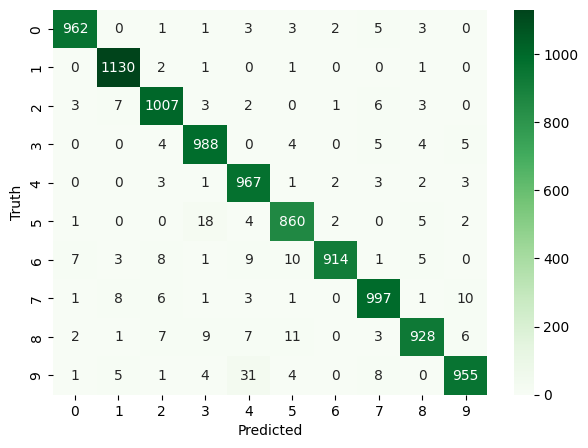

In [90]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Predictive System

In [91]:
input_img_path='/content/MNIST_digit.png'

input_img_path=cv2.imread(input_img_path)

In [92]:
type(input_img_path)

numpy.ndarray

In [93]:
print(input_img_path)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


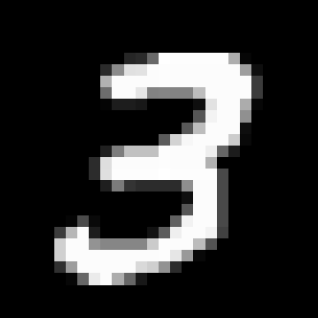

In [94]:
cv2_imshow(input_img_path)

In [95]:
input_img_path.shape

(318, 318, 3)

In [96]:
grayscale=cv2.cvtColor(input_img_path,cv2.COLOR_RGB2GRAY)

In [97]:
grayscale.shape

(318, 318)

In [98]:
input_img_resize=cv2.resize(grayscale,(28,28))

In [99]:
input_img_resize.shape

(28, 28)

In [100]:
cv2_imshow(input_img_resize)

In [101]:
input_img_resize=input_img_resize/255

In [102]:
input_img_reshape=np.reshape(input_img_resize,(1,28,28))

In [103]:
prediction=model.predict(input_img_reshape)
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[8.29739211e-09 1.08121196e-04 4.18823399e-03 1.00000000e+00
  4.90785815e-11 1.45715088e-01 8.92477705e-15 7.01113240e-05
  4.13700417e-02 1.58446938e-01]]


In [104]:
prediction_label=np.argmax(prediction)

In [105]:
print(prediction_label)

3


In [106]:
input_path_str = input("Path of the Image : ")

input_img = cv2.imread(input_path_str)

grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

input_img_resize = cv2.resize(grayscale, (28, 28))

input_img_resize = input_img_resize / 255

input_img_reshape = np.reshape(input_img_resize, (1, 28, 28))

prediction = model.predict(input_img_reshape)

prediction_label = np.argmax(prediction)

print(prediction_label)

Path of the Image : /content/MNIST_digit.png
1/1 [==============================] - 0s 23ms/step
3
